In [56]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    e_x = np.exp(x - x.max(axis=1, keepdims=True))  # Tránh tràn số
    return e_x / e_x.sum(axis=1, keepdims=True)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    t = tanh(x)
    return 1 - t**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha=0.05):
    return np.where(x > 0, 1, alpha)

def softmax_derivative(x):
    return

In [ ]:
def train_xor(x, y, epochs=1000, lr=10):
    np.random.seed(42)
    m = x.shape[0]
    # Khởi tạo trọng số nhỏ
    w1 = np.random.uniform(-1, 1, (x.shape[1], 2))
    b1 = np.random.uniform(-1, 1, (1, 2))
    w2 = np.random.uniform(-1, 1, (2, 1))
    b2 = np.random.uniform(-1, 1)
    epoch = 0
    while epoch <= epochs:
        # Forward
        z1 = np.dot(x, w1) + b1     # (4,2)
        a1 = sigmoid(z1)

        z2 = np.dot(a1, w2) + b2    # (4,1)
        a2 = sigmoid(z2)

        # Loss
        loss = -np.mean(y * np.log(a2) + (1 - y) * np.log(1 - a2))

        # Backpropagation
        dz2 = a2 - y
        dw2 = np.dot(a1.T, dz2) / m
        db2 = np.mean(dz2, axis=0, keepdims=True)

        dz1 = np.dot(dz2, w2.T) * sigmoid_derivative(z1)
        dw1 = np.dot(x.T, dz1) / m
        db1 = np.mean(dz1, axis=0, keepdims=True)

        # Cập nhật
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1

        epoch += 1

    return x, y, a2, np.round(a2), loss


x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])

# Huấn luyện
x, y, output, prediction, loss = train_xor(x, y, epochs=10000, lr=17)

# Kết quả
for i in range(4):
    print(f"Input: {x[i]}, Expected: {y[i][0]}, Predicted: {int(prediction[i][0])}")

print("Loss:", loss)

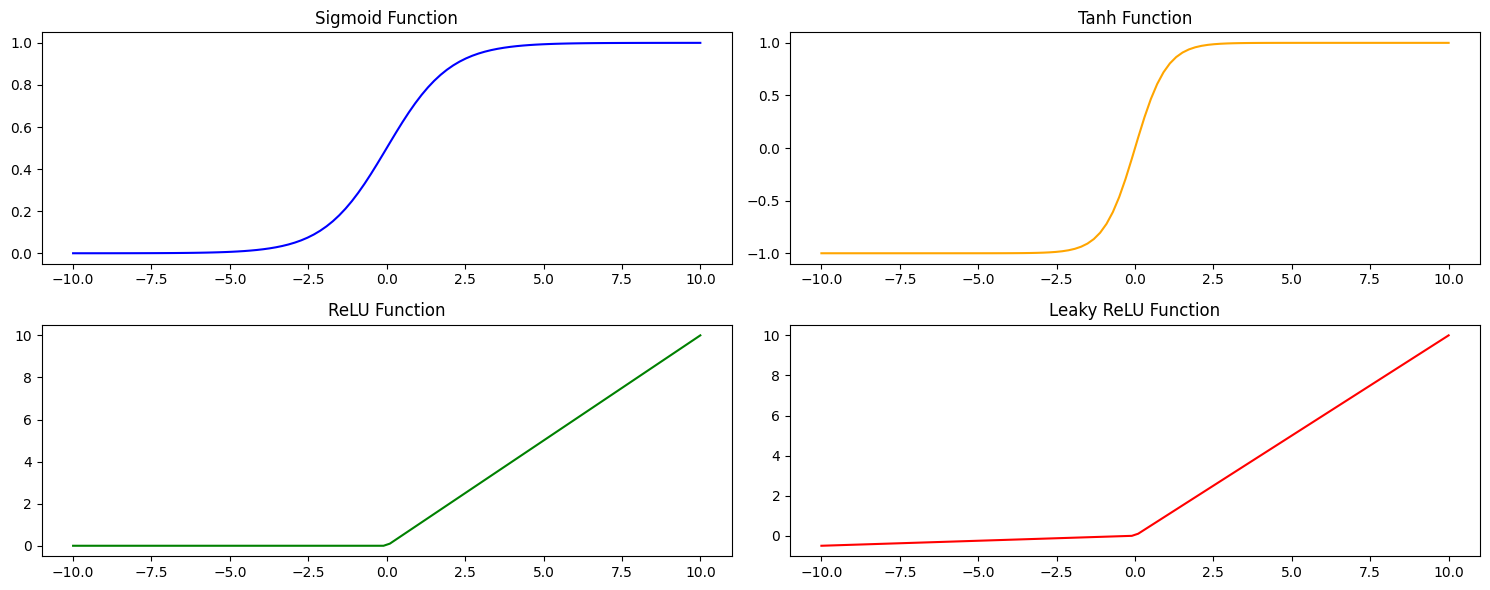

In [52]:
# Plot sigmoid function, tanh function, relu function, and leaky relu function
import matplotlib.pyplot as plt
x_values = np.linspace(-10, 10, 100)
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.plot(x_values, sigmoid(x_values), label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.subplot(2, 2, 2)
plt.plot(x_values, tanh(x_values), label='Tanh', color='orange')
plt.title('Tanh Function')
plt.subplot(2, 2, 3)
plt.plot(x_values, relu(x_values), label='ReLU', color='green')
plt.title('ReLU Function')
plt.subplot(2, 2, 4)
plt.plot(x_values, leaky_relu(x_values), label='Leaky ReLU', color='red')
plt.title('Leaky ReLU Function')
plt.tight_layout()
plt.show()

In [19]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def train_xor_multi_hidden(x, y, n_hidden=4, epochs=10000, lr=0.1):
    input_size = x.shape[1]
    output_size = y.shape[1]

    # Khởi tạo trọng số
    w1 = np.random.uniform(-1, 1, (input_size, n_hidden))
    b1 = np.random.uniform(-1, 1, (1, n_hidden))
    w2 = np.random.uniform(-1, 1, (n_hidden, output_size))
    b2 = np.random.uniform(-1, 1, (1, output_size))

    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(x, w1) + b1           # (batch_size, n_hidden)
        a1 = sigmoid(z1)

        z2 = np.dot(a1, w2) + b2          # (batch_size, output_size)
        a2 = sigmoid(z2)

        # Loss (binary cross-entropy)
        loss = -np.mean(y * np.log(a2) + (1 - y) * np.log(1 - a2))

        # Backpropagation
        dz2 = a2 - y                      # (batch_size, output_size)
        dw2 = np.dot(a1.T, dz2) / x.shape[0]
        db2 = np.sum(dz2, axis=0, keepdims=True) / x.shape[0]

        dz1 = np.dot(dz2, w2.T) * sigmoid_derivative(z1)  # (batch_size, n_hidden)
        dw1 = np.dot(x.T, dz1) / x.shape[0]
        db1 = np.sum(dz1, axis=0, keepdims=True) / x.shape[0]

        # Cập nhật trọng số
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1

    return w1, b1, w2, b2, loss

def predict(x, w1, b1, w2, b2):
    z1 = np.dot(x, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    return np.round(a2)

# Dữ liệu XOR
x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Huấn luyện với 4 neuron tầng ẩn
w1, b1, w2, b2, loss = train_xor_multi_hidden(x, y, n_hidden=16, epochs=10000, lr=17)

# Dự đoán
predictions = predict(x, w1, b1, w2, b2)

for i in range(len(x)):
    print(f"Input: {x[i]}, Expected: {y[i][0]}, Predicted: {int(predictions[i][0])}")

print(f"Loss cuối cùng: {loss}")

Input: [0 0], Expected: 0, Predicted: 0
Input: [0 1], Expected: 1, Predicted: 1
Input: [1 0], Expected: 1, Predicted: 1
Input: [1 1], Expected: 0, Predicted: 0
Loss cuối cùng: 5.3509275550995045e-05


In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Tạo dữ liệu ngẫu nhiên
data = np.random.rand(1000, 5)

# Xây dựng mô hình Autoencoder
input_layer = Input(shape=(5,))
encoded = Dense(10, activation='relu')(input_layer)
layer2 = Dense(20, activation='relu')(encoded)
layer3 = Dense(50, activation='relu')(layer2)
layer4 = Dense(100, activation='relu')(layer3)
decoded = Dense(5, activation='sigmoid')(layer4)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Huấn luyện mô hình
autoencoder.fit(data, data, epochs=50, batch_size=32)

# Kiểm tra kết quả
compressed_data = autoencoder.predict(data)
print("Dữ liệu gốc:", data[0])
print("Dữ liệu tái tạo:", compressed_data[0])

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0831   
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0664 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0442 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0311 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0231 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 
Ep